In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [3]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)

def x_sm(p):
    return -100+4.3*p*(1-0.25)

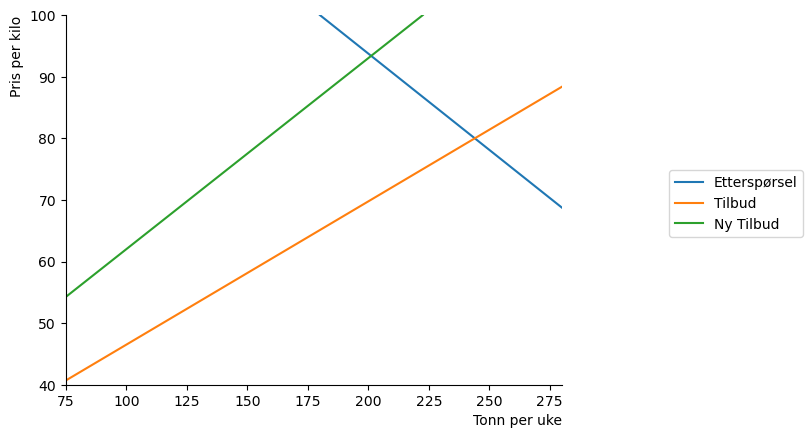

In [4]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Ny Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

In [5]:
x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

#uten MVA 
eq_cond=sp.Eq(x_d(p),x_s(p,0))
eq_cond

#med MVA
eq_cond2=sp.Eq(x_d(p),x_sm(p))
eq_cond2

Eq(500 - 3.2*p, 3.225*p - 100)

In [6]:
# løs for p uten MVA
p_eq1=sp.solve(eq_cond,p)
p_eq1[0]

80.0000000000000

In [7]:
#for P med MVA
p_eq=sp.solve(eq_cond2,p)
p_eq[0]

93.3852140077821

In [8]:
# finn kvantum uten MVA
x_eq=x_s(p_eq1[0],0)
x_eq

244.000000000000

In [9]:
#kvantum med MVA
x_eq1=x_sm(p_eq[0])
x_eq1

201.167315175097

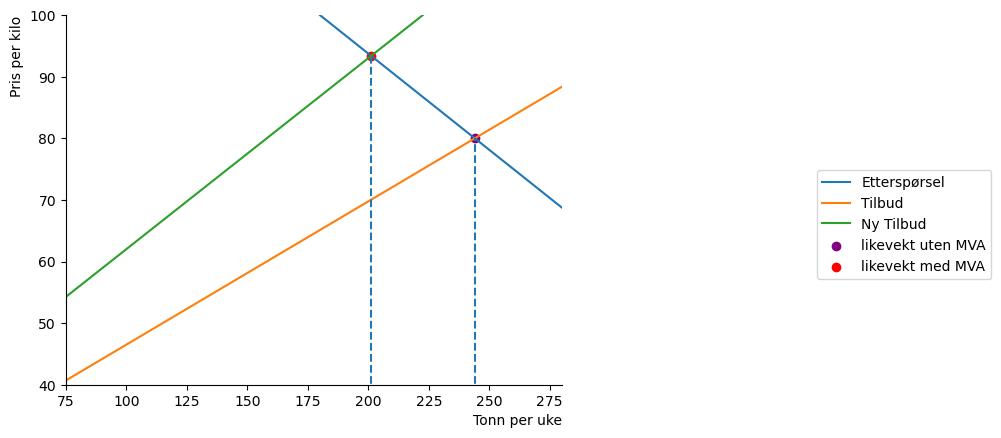

In [10]:
p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s(p_num, 0.25),p_num, label='Ny Tilbud')

ax.scatter(244,80, label = 'likevekt uten MVA', color='purple')

ax.scatter(201,93.3, label = 'likevekt med MVA', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6));

ax.vlines(201,0,93, linestyles='dashed')

ax.vlines(244,0,80, linestyles='dashed')

In [11]:
p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)
p_0 = p_eq_fn(0,0)
p_0

93.3852140077821

In [12]:
x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)
x_eq_fn(t,T)

244.0

In [13]:
p_kons = round(p_eq_fn(0,0),2)
p_kons

93.39

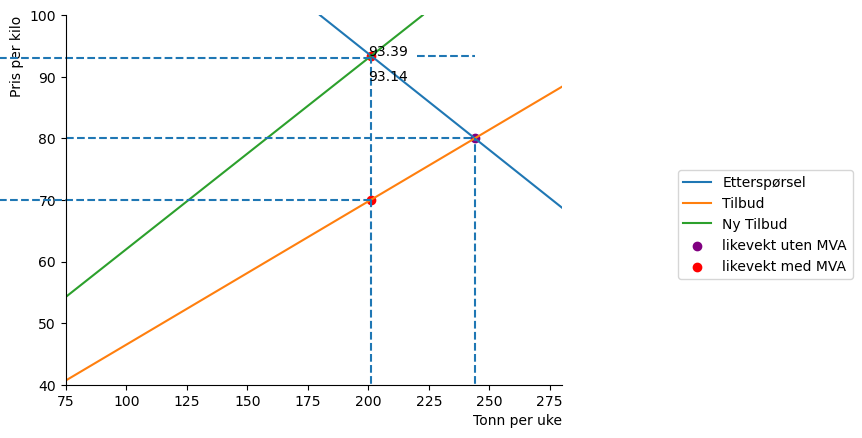

In [14]:
q=np.linspace(75, x_eq_fn(0,0), 250)

ax.vlines(0,0,0,linestyles='dashed', clip_on=False)
ax.hlines(80,75,244, linestyles='dashed', clip_on=False)
ax.hlines(70,0, 201, linestyles='dashed', clip_on=False)
ax.hlines(93,0, 201, linestyles='dashed', clip_on=False)
ax.scatter(201,70, color='red')

# sett inn likevektsverdier i figuren

ax.annotate(p_kons, xy=(200, p_kons), annotation_clip=False)
ax.annotate(p_kons-0.25, xy=(200, p_kons-4), annotation_clip=False)

ax.legend(bbox_to_anchor=(1.6,0.6))

ax.hlines(p_eq_fn(0,0),220,x_eq_fn(0,0), linestyles='dashed')

ax.legend(bbox_to_anchor=(1.6,0.6))
fig


In [22]:
#skatteinntekter
200*(93.3-70)

4659.999999999999

In [19]:
#konsumentandel
200*(93.39-80)

2678.0

In [20]:
#produsentandel
20*(80-70)

200

In [15]:
#det finnes fordeler og ulemper ved begge
#kommer ann på hvilken type vare eller tjeneste det er snakk om. Det  vil påvirke statens inntjening, samt produktiviteten i markedet. 
#f.eks omregistreringsavgift på en bil. Dette koster det samme for en lada og en Porsche. Her gir det mening med en stykkprisavgift. 
#Merverdiavgift knytter seg til verdien av den underliggende varen eller tjenesten, og kan være fordelaktig, ifht til omfordeling, og gir en høyere skatteinngang ved
#høyere priser. MVA er derfor lettere å ha med å gjøre. Ved stykkprisavgift må du øke denne ved generell prisøkning - noe du slepper ved MVA, da den regner med prosent.